<a href="https://colab.research.google.com/github/ferjorosa/learn-fastai/blob/main/0%20-%20Examples/mnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST example

## Imports

In [89]:
#hide (Google Colab)
!pip install fastai --upgrade -q
import fastai
print(fastai.__version__)

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

2.5.3


In [90]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Data

In [91]:
path = untar_data(URLs.MNIST)

zeros = (path/"training"/"0").ls().sorted()
ones = (path/"training"/"1").ls().sorted()
twos = (path/"training"/"2").ls().sorted()
threes = (path/"training"/"3").ls().sorted()
fours = (path/"training"/"4").ls().sorted()
fives = (path/"training"/"5").ls().sorted()
sixes = (path/"training"/"6").ls().sorted()
sevens = (path/"training"/"7").ls().sorted()
eights = (path/"training"/"8").ls().sorted()
nines = (path/"training"/"9").ls().sorted()

In [92]:
zero_tensors = [tensor(Image.open(o)) for o in zeros]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]

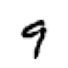

In [93]:
show_image(nine_tensors[2])

In [94]:
nine_tensors[0].shape[0]

28

In [95]:
img_dim = nine_tensors[0].shape[0]**2

stacked_zeros = torch.stack(zero_tensors).view(-1, img_dim).float()/255
stacked_ones = torch.stack(one_tensors).view(-1, img_dim).float()/255
stacked_twos = torch.stack(two_tensors).view(-1, img_dim).float()/255
stacked_threes = torch.stack(three_tensors).view(-1, img_dim).float()/255
stacked_fours = torch.stack(four_tensors).view(-1, img_dim).float()/255
stacked_fives = torch.stack(five_tensors).view(-1, img_dim).float()/255
stacked_sixes = torch.stack(six_tensors).view(-1, img_dim).float()/255
stacked_sevens = torch.stack(seven_tensors).view(-1, img_dim).float()/255
stacked_eights = torch.stack(eight_tensors).view(-1, img_dim).float()/255
stacked_nines = torch.stack(nine_tensors).view(-1, img_dim).float()/255

stacked_eights.shape

torch.Size([5851, 784])

In [96]:
data_x =torch.cat([stacked_zeros, 
                   stacked_ones,
                   stacked_twos, 
                   stacked_threes,
                   stacked_fours,
                   stacked_fives,
                   stacked_sixes,
                   stacked_sevens,
                   stacked_eights,
                   stacked_nines])

data_y = torch.cat([torch.tensor([0] * len(stacked_zeros)), 
                    torch.tensor([1] * len(stacked_ones)),
                    torch.tensor([2] * len(stacked_twos)),
                    torch.tensor([3] * len(stacked_threes)),
                    torch.tensor([4] * len(stacked_fours)),
                    torch.tensor([5] * len(stacked_fives)),
                    torch.tensor([6] * len(stacked_sixes)),
                    torch.tensor([7] * len(stacked_sevens)),
                    torch.tensor([8] * len(stacked_eights)),
                    torch.tensor([9] * len(stacked_nines))])#.unsqueeze(1)

(data_x.shape, data_y.shape)

(torch.Size([60000, 784]), torch.Size([60000]))

**Note on unsqueeze(1).** In the "basic_mnist_example", we used a dimension of [60000, 1] that was obtained by using unsqueeze. However, when using softmax, this has resulted in issues...

#### Divide training data into "train" and "test"

In order to do it we are going to sample (without replacement) a number of integer values from 0 to 60000. Then select those data instances as the test data, and the rest of data instances as the training data.


In [97]:
n_data = data_x.shape[0]
n_test = 5000

test_indices = np.random.choice(n_data, n_test, replace=False)
test_mask = np.zeros(n_data, bool)
test_mask[test_indices] = True

test_data_x = data_x[test_mask]
test_data_y = data_y[test_mask]

train_data_x = data_x[~test_mask]
train_data_y = data_y[~test_mask]

print(train_data_x.shape, test_data_x.shape)
print(train_data_y.shape, test_data_y.shape)

torch.Size([55000, 784]) torch.Size([5000, 784])
torch.Size([55000]) torch.Size([5000])


#### Generate the "validation" data from the remaining training data
Identically to the test set, we are going to consider 5000 data instances



In [98]:
n_data = train_data_x.shape[0]
n_valid = 5000

valid_indices = np.random.choice(n_data, n_valid, replace=False)
valid_mask = np.zeros(n_data, bool)
valid_mask[valid_indices] = True

valid_data_x = train_data_x[valid_mask]
valid_data_y = train_data_y[valid_mask]

train_data_x = train_data_x[~valid_mask]
train_data_y = train_data_y[~valid_mask]

print(train_data_x.shape, valid_data_x.shape)
print(train_data_y.shape, valid_data_y.shape)

torch.Size([50000, 784]) torch.Size([5000, 784])
torch.Size([50000]) torch.Size([5000])


#### Create the DataLoaders object that will be used in training

In [99]:
train_dset = list(zip(train_data_x, train_data_y))
valid_dset = list(zip(valid_data_x, valid_data_y))
test_dset = list(zip(test_data_x, test_data_y))

In [100]:
train_dl = DataLoader(train_dset, batch_size=256, shuffle=True)
xb, yb = first(train_dl)
print(xb.shape, yb.shape)

valid_dl = DataLoader(valid_dset, batch_size=256, shuffle=True)
xb, yb = first(valid_dl)
print(xb.shape, yb.shape)

test_dl = DataLoader(test_dset, batch_size=256,shuffle=True)
xb, yb = first(test_dl)
print(xb.shape, yb.shape)

torch.Size([256, 784]) torch.Size([256])
torch.Size([256, 784]) torch.Size([256])
torch.Size([256, 784]) torch.Size([256])


## Model training

#### Cross-entropy loss

When using the cross-entropy loss, it is not necessary that we establish a softmax layer in the model because it will be implicitly called by Pytorch.

In [101]:
from fastai.metrics import accuracy

lr = 1e-3
dls = DataLoaders(train_dl, valid_dl)

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10)
    )

learner_cel = Learner(dls, simple_net, opt_func=SGD, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
learner_cel.fit(15, lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.289698,2.282581,0.140000,00:01
1,2.263125,2.253633,0.188200,00:01
2,2.232080,2.222670,0.257800,00:01
3,2.198383,2.189448,0.319600,00:01
4,2.165480,2.153999,0.376400,00:02
5,2.128743,2.116166,0.425000,00:02
6,2.088301,2.075546,0.473400,00:02
7,2.044775,2.031604,0.518000,00:01
8,1.998031,1.984089,0.549600,00:02
9,1.950197,1.932628,0.580400,00:02


#### Negative log-likelihood loss

When using the NLL loss, it is necessarty that we establish a LogSoftmax layer at the end of the model.

In [102]:
from fastai.metrics import accuracy

lr = 1e-3
dls = DataLoaders(train_dl, valid_dl)

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10),
    nn.LogSoftmax(dim=1)
    )

learner_nll = Learner(dls, simple_net, opt_func=SGD, loss_func=nn.NLLLoss(), metrics=accuracy)
learner_nll.fit(15, lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.292419,2.284858,0.109400,00:01
1,2.266192,2.256319,0.129200,00:01
2,2.236959,2.227057,0.145400,00:01
3,2.205510,2.195507,0.158000,00:01
4,2.171205,2.161213,0.175800,00:01
5,2.135176,2.124203,0.217200,00:01
6,2.096892,2.084690,0.294400,00:01
7,2.056328,2.042446,0.415800,00:01
8,2.010523,1.997198,0.518200,00:01
9,1.963500,1.948725,0.589000,00:01


## Inference

#### `get_preds`

This function expects the data to be already preprocessed

##### All data

In [103]:
from sklearn.metrics import accuracy_score

preds, _ = learner_nll.get_preds(dl=test_dl) # We could use any of the models
print(preds.shape)
y_pred = torch.softmax(preds, dim=1)
y_pred = torch.argmax(y_pred, dim=1)
print(y_pred.shape)
print(test_data_y.shape)

accuracy_score(y_pred.numpy(), test_data_y.numpy())

torch.Size([5000, 10])
torch.Size([5000])
torch.Size([5000])


0.7178

##### single batch

In [104]:
test_x, test_y = first(test_dl)
preds, _ = learner_nll.get_preds(dl=[(test_x, test_y)])
preds.shape

torch.Size([256, 10])

##### multiple batches

In [105]:
test_x, test_y = first(test_dl)
preds, _ = learner_nll.get_preds(dl=[(test_x, test_y), (test_x, test_y)])

print(test_x.shape)
print(test_y.shape)
print(preds.shape)

torch.Size([256, 784])
torch.Size([256])
torch.Size([512, 10])


##### multiple data instances

In [106]:
indexes = range(0,2)
test_x = test_data_x[indexes]
test_y = test_data_y[indexes]

preds, _ = learner_nll.get_preds(dl=[(test_x, test_y)])
print(test_x.shape)
print(test_y.shape)
print(preds.shape)

torch.Size([2, 784])
torch.Size([2])
torch.Size([2, 10])


##### single data instance

In [107]:
index = 0
test_x = test_data_x[index].unsqueeze(1).t()
test_y = torch.tensor([test_data_y[index]]) # Little trick to make the tensor size 1

preds, _ = learner_nll.get_preds(dl=[(test_x, test_y)])
print(test_x.shape)
print(test_y.shape)
print(preds.shape)

torch.Size([1, 784])
torch.Size([1])
torch.Size([1, 10])


## Model interpretation

We consider `learner_nll`, but we could use `learner_cen` instead

#### Validation data

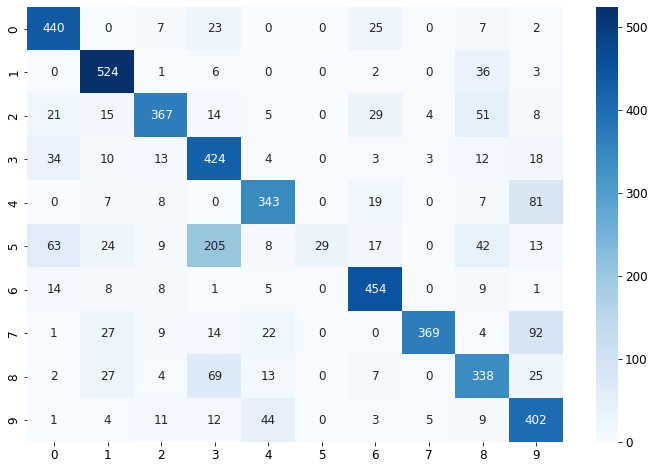

0.738


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# preds -> predictions from the model on the validation data
# y     -> true labels of the validation data
preds,y = learner_nll.get_preds() 
y_pred = torch.softmax(preds, dim=1)
y_pred = torch.argmax(y_pred, dim=1)
conf_matrix = confusion_matrix(y.numpy(), y_pred.numpy())

# Set Figure
fig = plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')

plt.show()

print(accuracy_score(y_pred.numpy(), y.numpy()))

#### Test data

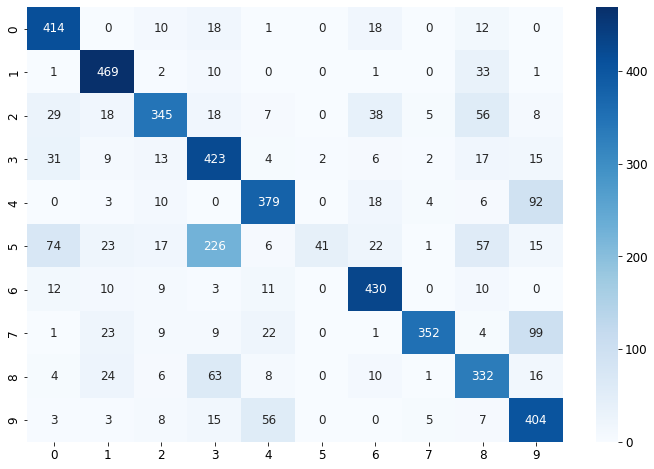

0.7178


In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# preds -> predictions from the model on the validation data
# y     -> true labels of the validation data
preds,y = learner_nll.get_preds(dl=test_dl) 
y_pred = torch.softmax(preds, dim=1)
y_pred = torch.argmax(y_pred, dim=1)
conf_matrix = confusion_matrix(y.numpy(), y_pred.numpy())

# Set Figure
fig = plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')

plt.show()

print(accuracy_score(y_pred.numpy(), y.numpy()))

## Extra: Learning rate finder

SuggestedLRs(valley=0.019054606556892395)

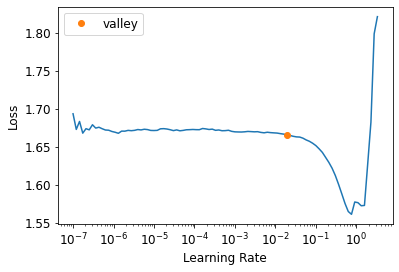

In [110]:
learner_nll.lr_find()

## Extra: Inference with CNN Learner

This mini-example is to show that predict acts differently on a self-made learner and one of fastAI learners. In this case, it expects a path, and internally applies all of the required transformations. It is probably like this due to `ImageDataLoader`

Learner is different from `cnn_learner`. It seems that a sequential learner expects a tensor but a cnn_learner can handle a images directly (
<a href="https://muellerzr.github.io/fastinference/inference/#Learner.predict">FastAI documentation </a>).

**Example:**

In [111]:
path = untar_data(URLs.PETS)
fnames = get_image_files(path/'images')
pat = r'(.+)_\d+.jpg$'
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs=64

dls = ImageDataLoaders.from_name_re(path, fnames, pat, batch_tfms=batch_tfms, 
                                   item_tfms=item_tfms, bs=bs)

learn = cnn_learner(dls, resnet18, metrics=accuracy)

o = learn.predict(fnames[0], with_input=False)
o

('Persian',
 TensorBase(7),
 TensorBase([2.3357e-06, 3.5943e-08, 8.1706e-04, 1.6442e-03, 1.8831e-03, 5.5561e-08, 1.4422e-07, 9.6972e-01, 2.7723e-05, 1.0038e-06, 4.3018e-07, 1.8218e-02, 4.9930e-07, 3.3898e-03, 4.4042e-06, 5.3617e-06,
         1.3067e-07, 4.5116e-05, 1.9314e-05, 1.7459e-06, 1.1442e-09, 1.2377e-06, 4.1461e-03, 3.9803e-09, 1.4345e-08, 4.0935e-08, 1.4509e-06, 1.3102e-05, 3.3311e-07, 2.7280e-06, 4.9759e-06, 6.3436e-06,
         4.2681e-05, 8.4882e-09, 2.4624e-06, 8.7002e-08, 2.0216e-07]))

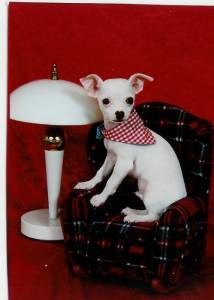

In [112]:
Image.open(fnames[0])